In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import os
import scipy
import matplotlib.cm as cm
from datetime import datetime
import seaborn as sns
import pytz
import matplotlib
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn import metrics

In [2]:
filename = 'CO-OPS__8658163__wl' #downloaded water level data from NOAA Station 8658163 Wrightsville Beach

filepath = os.path.join('data', filename+'.csv')
waterlevel = pd.read_csv(filepath, header = 0, parse_dates = [0])
waterlevel.head()

,DateTime,WaterLevel,Sigma,O or I (for verified),F,R,L,Quality
0,2025-05-07 00:00:00,1.768,0.266,0,0,0,0,v
1,2025-05-07 00:06:00,1.703,0.299,0,0,0,0,v
2,2025-05-07 00:12:00,1.634,0.249,0,0,0,0,v
3,2025-05-07 00:18:00,1.673,0.312,0,0,0,0,v
4,2025-05-07 00:24:00,1.545,0.282,0,0,0,0,v


In [3]:
filename = 'CB02JuneJuly' #downloaded water level data from CB02
filepath = os.path.join('data', filename+'.csv')
wl = pd.read_csv(filepath, header = 0, parse_dates = [0])
wl.head()

,Time (America/New_York),SUNNYD_CB_02 Water level (ft),SUNNYD_CB_02 Water level (ft) quality
0,2025-05-27 20:00:00,1.096969,not evaluated
1,2025-05-27 20:06:00,1.115124,not evaluated
2,2025-05-27 20:12:00,1.152381,not evaluated
3,2025-05-27 20:18:00,1.184646,not evaluated
4,2025-05-27 20:24:00,1.222158,not evaluated


In [5]:
filename = 'JuneJulyRain' #downloaded weather data from CORMP station MSNB_S

filepath = os.path.join('data', filename+'.csv')
rain = pd.read_csv(filepath, header = 0, parse_dates = [0])
rain.head()

,Time (America/New_York),MSNB_S Rain (day) (in),MSNB_S Rain (day) (in) quality
0,2025-05-27 00:00:00,0.05,not evaluated
1,2025-05-27 00:30:00,0.00,not evaluated
2,2025-05-27 00:36:00,0.00,not evaluated
3,2025-05-27 00:42:00,0.00,not evaluated
4,2025-05-27 00:48:00,0.00,not evaluated


In [7]:
filename = '2025_07_02_C3PO_Offload'

filepath = os.path.join('data', filename+'.csv')
cond = pd.read_csv(filepath, header = 0)
cond['datetime']=pd.to_datetime(cond["Real_Time"], unit='s')
cond['datetime'] = cond['datetime'] - pd.Timedelta(hours=4, minutes=0, seconds=0)
cond.head()

,Real_Time,Temp_C,Cond_uScm-1,datetime
0,1745506803,24.48,0.0,2025-04-24 11:00:03
1,1745507163,26.02,0.0,2025-04-24 11:06:03
2,1745507522,25.71,0.0,2025-04-24 11:12:02
3,1745507882,25.34,0.0,2025-04-24 11:18:02
4,1745508242,25.67,0.0,2025-04-24 11:24:02


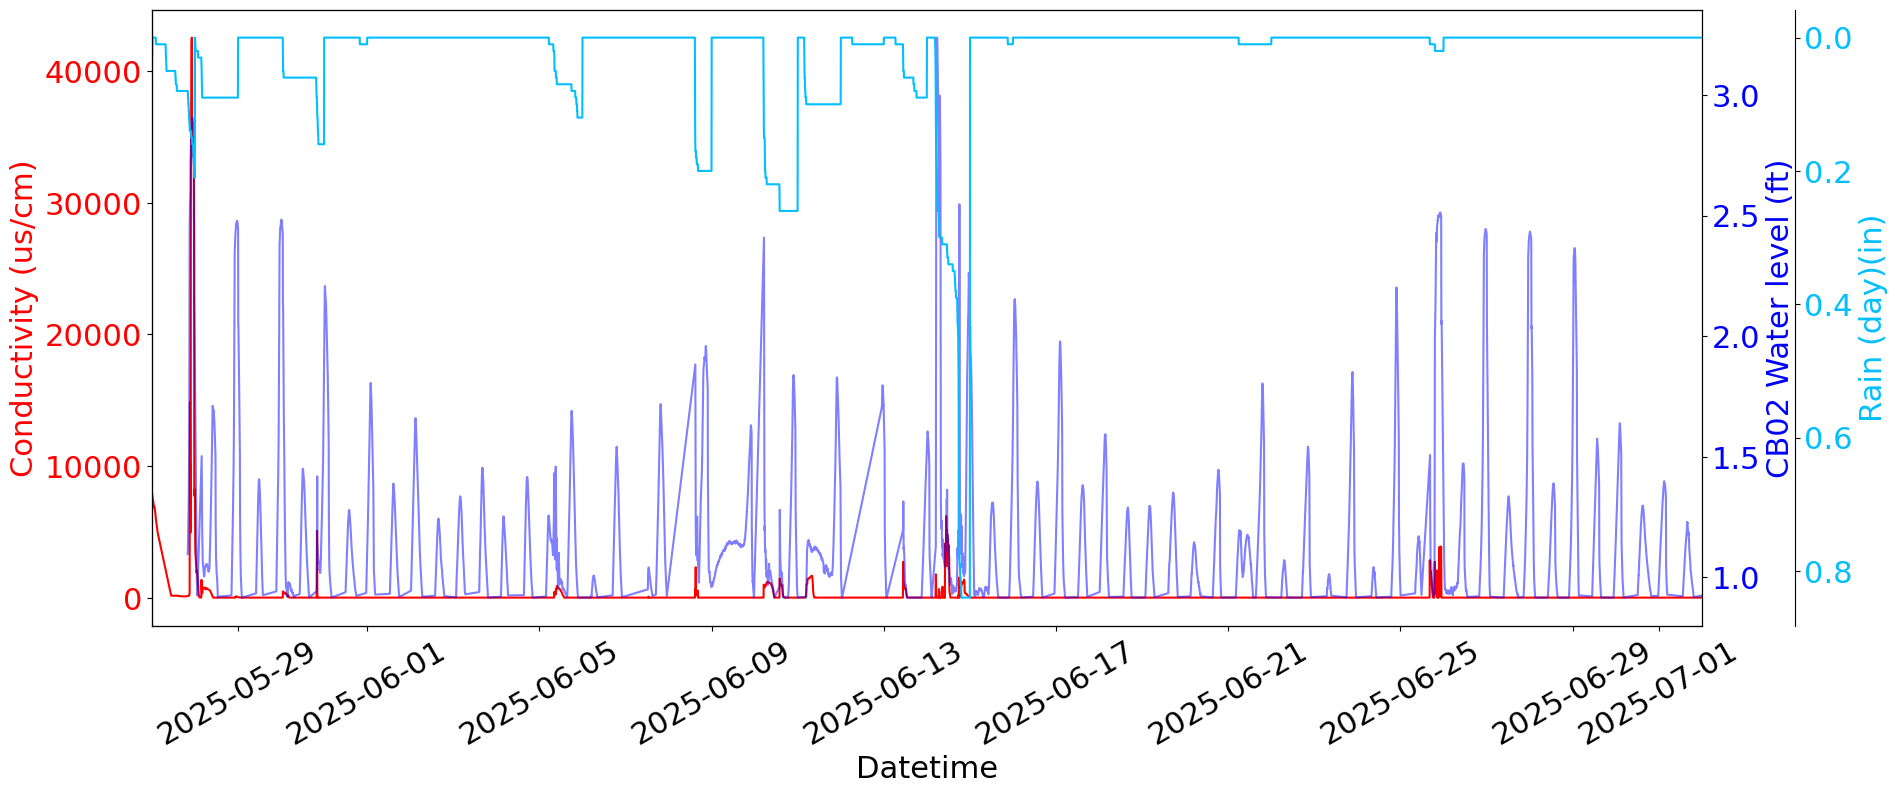

In [9]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(figsize = (20, 8))
ax2 = axs.twinx()
ax3 = axs.twinx()

#Plot the conductivity 
axs.plot(cond["datetime"], cond["Cond_uScm-1"], label = "Conductivity (us/cm)", color = "red")
axs.set_ylabel('Conductivity (us/cm)', color="red")
axs.set_xlabel('Datetime')
axs.tick_params(axis='y', labelcolor="red")
axs.tick_params(axis='x', labelrotation=30)


# Add tides 
ax2.plot(wl["Time (America/New_York)"], wl["SUNNYD_CB_02 Water level (ft)"], color = "blue", alpha = 0.5)
ax2.set_ylabel('CB02 Water level (ft)', color="blue")  
ax2.tick_params(axis='y', labelcolor="blue")

# Add rain 
ax3.plot(rain["Time (America/New_York)"], rain["MSNB_S Rain (day) (in)"], color = "deepskyblue")
ax3.set_ylabel('Rain (day)(in)', color="deepskyblue")  
ax3.tick_params(axis='y', labelcolor="deepskyblue")
ax3.spines.right.set_position(("axes", 1.06))
ax3.invert_yaxis()

axs.set_xlim(pd.Timestamp('2025-05-27 00:00:00'), pd.Timestamp('2025-07-02 00:00:00'))

fig_fn = 'C3PO_waterlevel_example'
fig_file = os.path.join('Figures', fig_fn+'.png')
#plt.savefig(fig_file, dpi = 400, transparent=False)

In [11]:
#Same plot but with salinity instead of conductivity 
filename = 'ConductivitywithSalinity'

filepath = os.path.join('data', filename+'.csv')
sal = pd.read_csv(filepath, header = 0)
sal['datetime']=pd.to_datetime(sal["Real_Time"], unit='s')
sal['datetime'] = sal['datetime'] - pd.Timedelta(hours=4, minutes=0, seconds=0)
sal.head()

,Real_Time,Temp_C,Cond_uScm.1,Cond_uScm.cor,Cond_mScm,seaPressure,practicalSalinity,datetime
0,1745506803,24.48,0.0,262.0,0.262,0,0.125351,2025-04-24 11:00:03
1,1745507163,26.02,0.0,262.0,0.262,0,0.121398,2025-04-24 11:06:03
2,1745507522,25.71,0.0,262.0,0.262,0,0.122176,2025-04-24 11:12:02
3,1745507882,25.34,0.0,262.0,0.262,0,0.123116,2025-04-24 11:18:02
4,1745508242,25.67,0.0,262.0,0.262,0,0.122277,2025-04-24 11:24:02


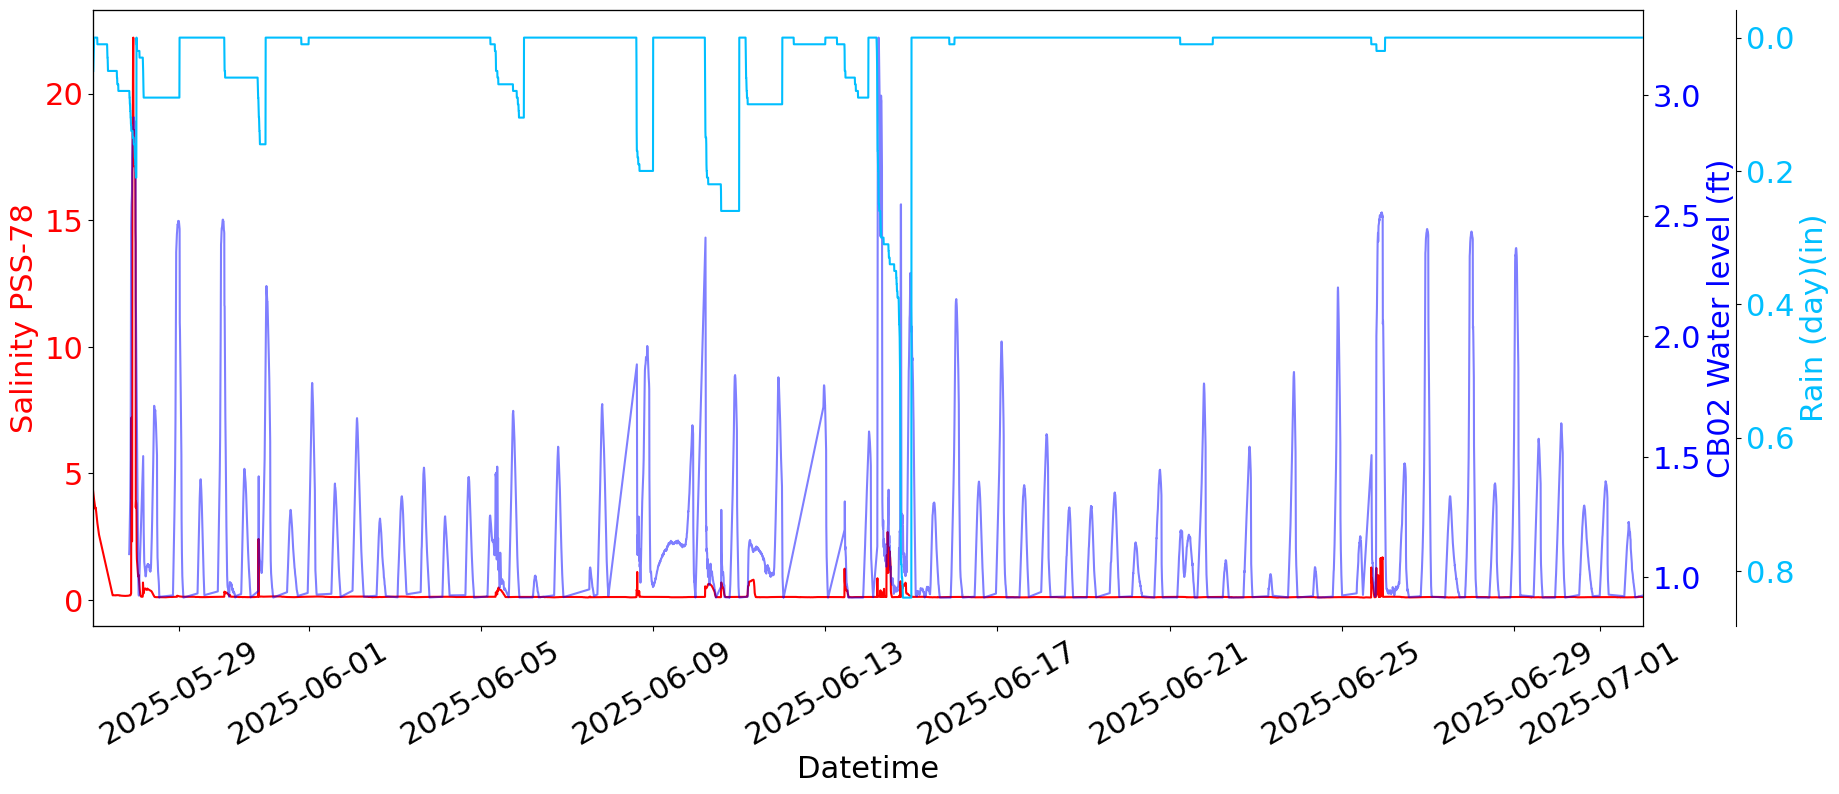

In [13]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(figsize = (20, 8))
ax2 = axs.twinx()
ax3 = axs.twinx()

#Plot the conductivity 
axs.plot(sal["datetime"], sal["practicalSalinity"], label = "Salinity", color = "red")
axs.set_ylabel('Salinity PSS-78', color="red")
axs.set_xlabel('Datetime')
axs.tick_params(axis='y', labelcolor="red")
axs.tick_params(axis='x', labelrotation=30)


# Add tides 
ax2.plot(wl["Time (America/New_York)"], wl["SUNNYD_CB_02 Water level (ft)"], color = "blue", alpha = 0.5)
ax2.set_ylabel('CB02 Water level (ft)', color="blue")  
ax2.tick_params(axis='y', labelcolor="blue")

# Add rain 
ax3.plot(rain["Time (America/New_York)"], rain["MSNB_S Rain (day) (in)"], color = "deepskyblue")
ax3.set_ylabel('Rain (day)(in)', color="deepskyblue")  
ax3.tick_params(axis='y', labelcolor="deepskyblue")
ax3.spines.right.set_position(("axes", 1.06))
ax3.invert_yaxis()

axs.set_xlim(pd.Timestamp('2025-05-27 00:00:00'), pd.Timestamp('2025-07-02 00:00:00'))

fig_fn = 'C3PO_waterlevel_salinity'
fig_file = os.path.join('Figures', fig_fn+'.png')
#plt.savefig(fig_file, dpi = 400, transparent=False)

### Liz's plot above but with tweaked y-axes

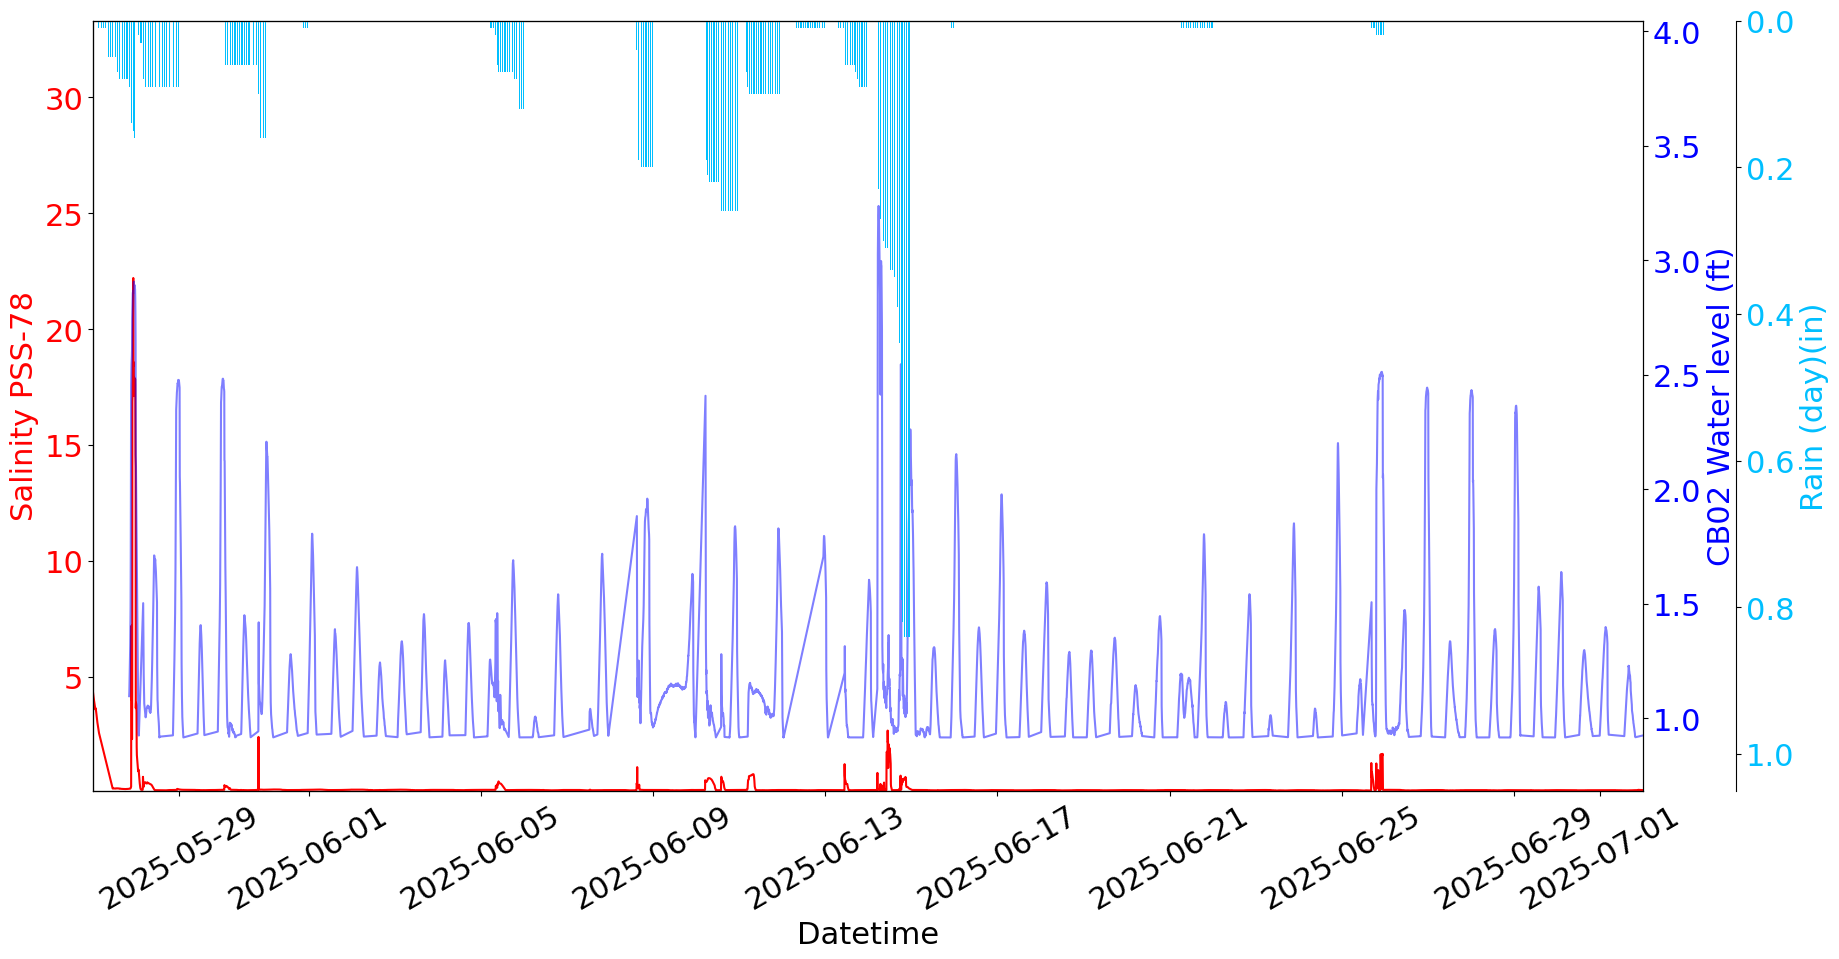

In [17]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(figsize = (20, 10))
ax2 = axs.twinx()
ax3 = axs.twinx()

#Plot the conductivity 
y1 = sal["practicalSalinity"]
y1max = np.nanmax(y1)
y1min = np.nanmin(y1)
y1range = y1max-y1min
axs.plot(sal["datetime"], y1, label = "Salinity", color = "red")
axs.set_ylabel('Salinity PSS-78', color="red")
axs.set_ylim(y1min, y1max*1.5)
axs.set_xlabel('Datetime')
axs.tick_params(axis='y', labelcolor="red")
axs.tick_params(axis='x', labelrotation=30)


# Add tides 
y2 = wl["SUNNYD_CB_02 Water level (ft)"]
y2min = np.nanmin(y2)
y2max = np.nanmax(y2)
y2range = y2max-y2min
ax2.plot(wl["Time (America/New_York)"], y2, color = "blue", alpha = 0.5)
ax2.set_ylabel('CB02 Water level (ft)', color="blue")  
ax2.set_ylim(y2min-y2range*0.1, y2max*1.25)
ax2.tick_params(axis='y', labelcolor="blue")

# Add rain 
y3 = rain["MSNB_S Rain (day) (in)"]
ax3.bar(rain["Time (America/New_York)"], y3, color = "deepskyblue", width = 0.002)
ax3.set_ylabel('Rain (day)(in)', color="deepskyblue")
ax3.set_ylim(0, np.nanmax(y3)*1.25)
ax3.tick_params(axis='y', labelcolor="deepskyblue")
ax3.spines.right.set_position(("axes", 1.06))
ax3.invert_yaxis()

axs.set_xlim(pd.Timestamp('2025-05-27 00:00:00'), pd.Timestamp('2025-07-02 00:00:00'))

fig_fn = 'C3PO_waterlevel_salinity_pjb'
fig_file = os.path.join('Figures', fig_fn+'.png')
plt.savefig(fig_file, dpi = 400, transparent=False)

### PJB Version
Just for fun—no significant improvement, just another way of looking at these data.

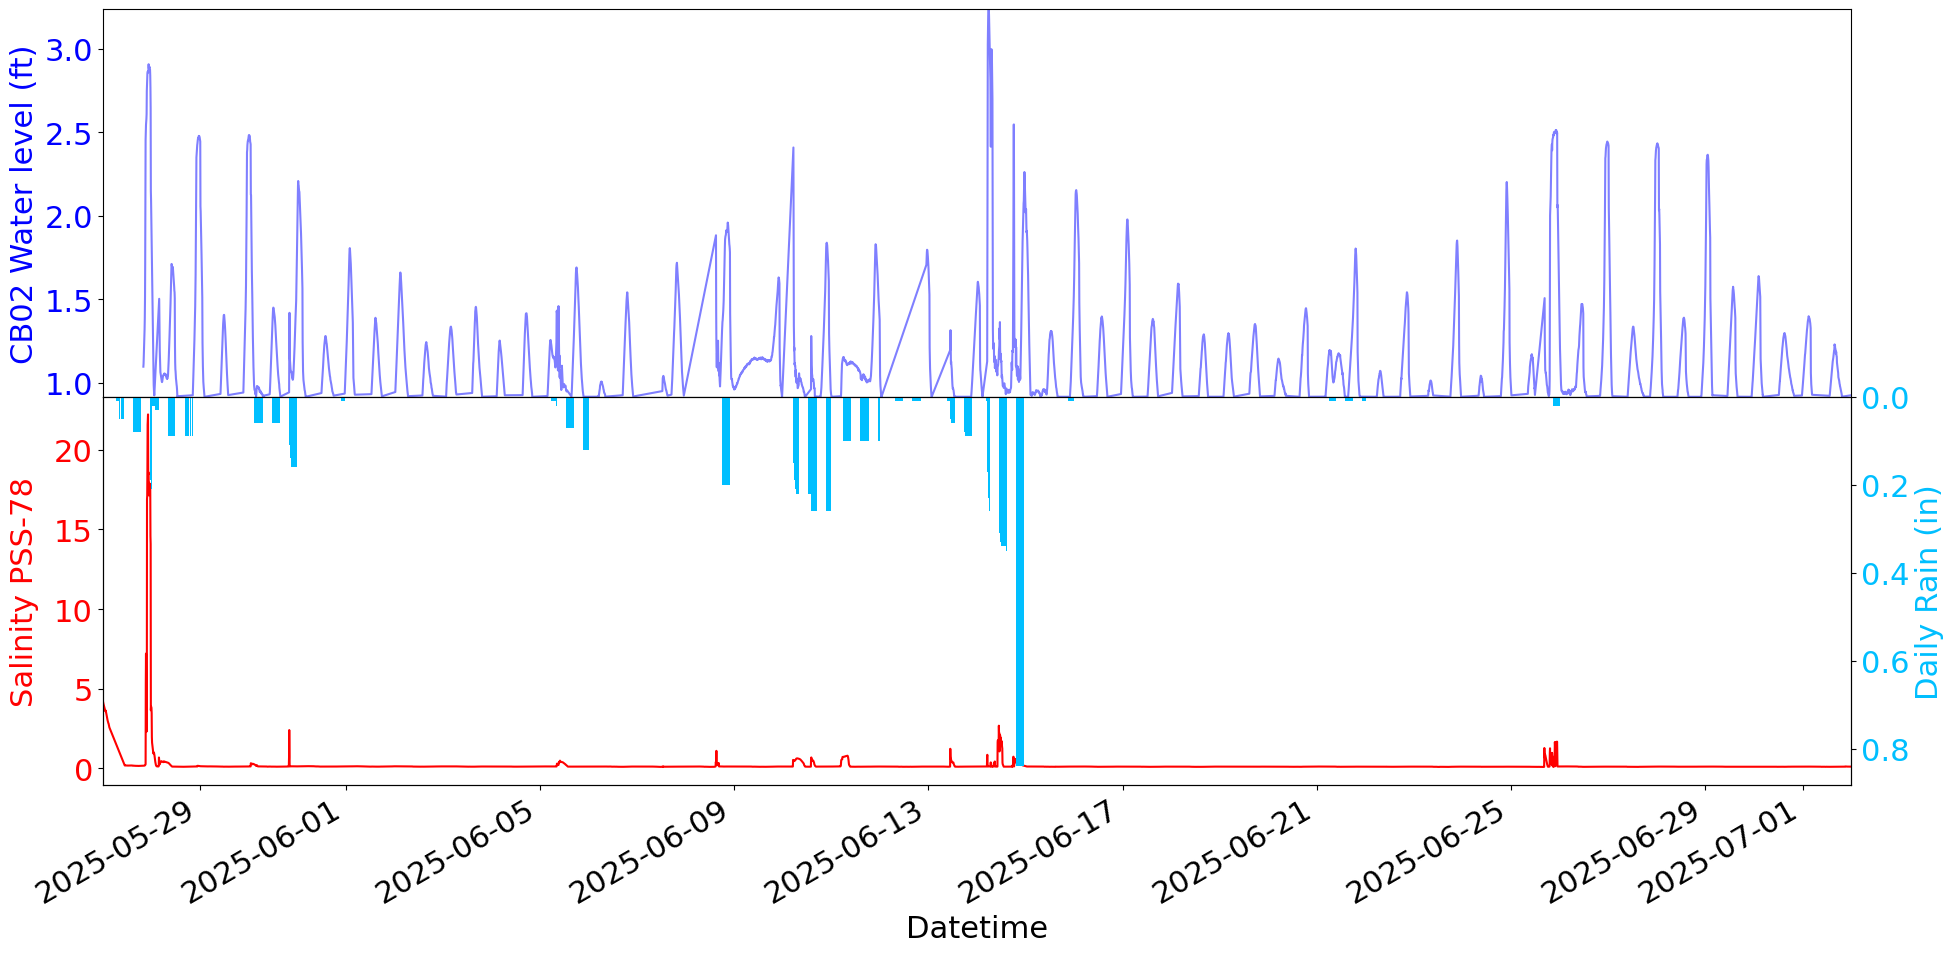

In [18]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(2, 1, figsize = (20, 10), sharex = True)
# Add tides 
y0 = wl["SUNNYD_CB_02 Water level (ft)"]
y0min = np.nanmin(y0)
y0max = np.nanmax(y0)

axs[0].plot(wl["Time (America/New_York)"], wl["SUNNYD_CB_02 Water level (ft)"], color = "blue", alpha = 0.5)
axs[0].set_ylabel('CB02 Water level (ft)', color="blue")  
axs[0].set_ylim(y0min, y0max)
axs[0].tick_params(axis='y', labelcolor="blue")

#Plot the conductivity 
axs[1].plot(sal["datetime"], sal["practicalSalinity"], label = "Salinity", color = "red")
axs[1].set_ylabel('Salinity PSS-78', color="red")
axs[1].set_xlabel('Datetime')
axs[1].tick_params(axis='y', labelcolor="red")
axs[1].tick_params(axis='x', labelrotation=30)

# Add precip in a second y-axis
ax2 = axs[1].twinx()
ax2.bar(rain["Time (America/New_York)"], rain["MSNB_S Rain (day) (in)"], color = "deepskyblue", width = 0.002)
ax2.set_ylabel('Daily Rain (in)', color="deepskyblue")  
ax2.tick_params(axis='y', labelcolor="deepskyblue")
ax2.invert_yaxis()

axs[1].set_xlim(pd.Timestamp('2025-05-27 00:00:00'), pd.Timestamp('2025-07-02 00:00:00'))

fig.autofmt_xdate() # makes the date labels easier to read.
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
fig.align_ylabels()

fig_fn = 'C3PO_waterlevel_salinity_pjb2'
fig_file = os.path.join('Figures', fig_fn+'.png')
plt.savefig(fig_file, dpi = 400, transparent=False)